In [1]:
#MultipleLinear Industry Demonstation LinearRegression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\manug\Downloads\data_housing.csv")

In [5]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [9]:
df.shape

(506, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# Problem Statement: Train a linear regression model to predict the price of the house using given information 

In [17]:
# :Attribute Information (in order): 
# - CRIM per capita crime rate by town
# - ZN proportion of residential land zoned for lots over 25,000 sq.ft
# - INDUS proportion of non-retail business acres per town
# - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
# - NOX nitric oxides concentration (parts per 10 million) 
# - RM average number of rooms per dwelling 
# - AGE proportion of owner-occupied units built prior to 1940 
# - DIS weighted distances to five Boston employment centres 
# - RAD index of accessibility to radial highways 
# - TAX full-value property-tax rate per $10,000 
# - PTRATIO pupil-teacher ratio by town
# - B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
# - LSTAT % lower status of the population

In [19]:
df.isnull().sum()*100/df.shape[0]

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

In [21]:
df.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

In [25]:

num_cols=["CRIM","ZN","INDUS","NOX","RM","DIS","AGE","TAX","PTRATIO","B","LSTAT","Price"] 
cat_cols=["CHAS","RAD"]


### EDA


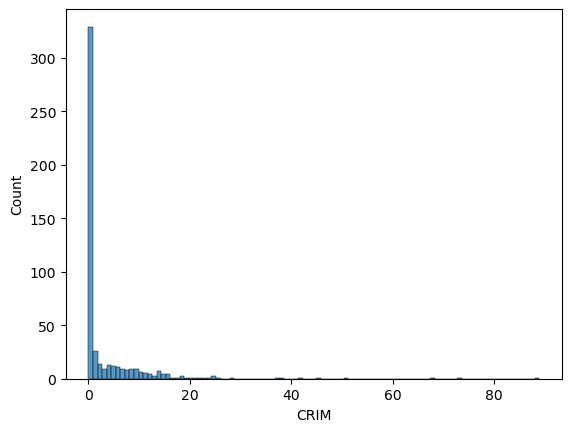

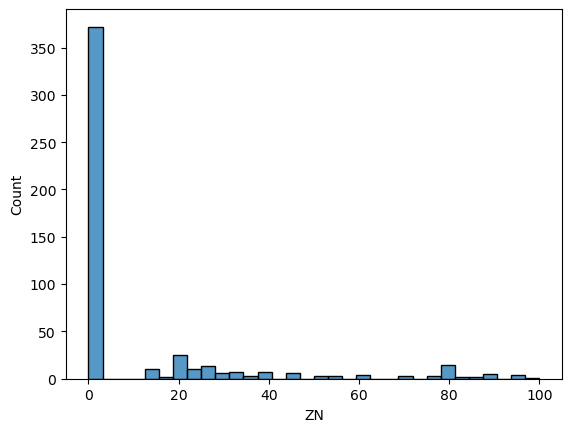

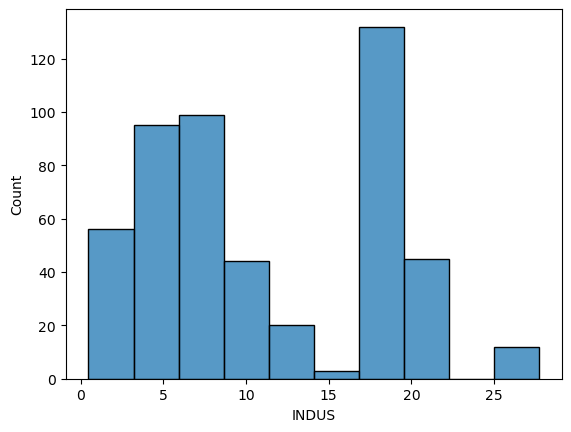

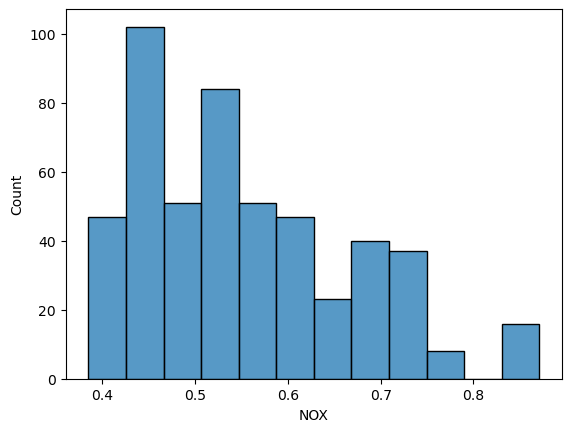

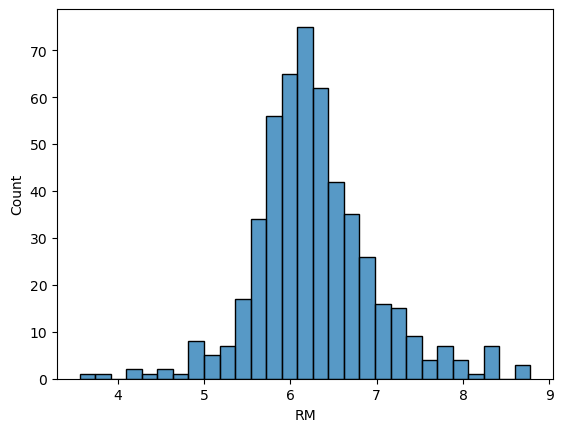

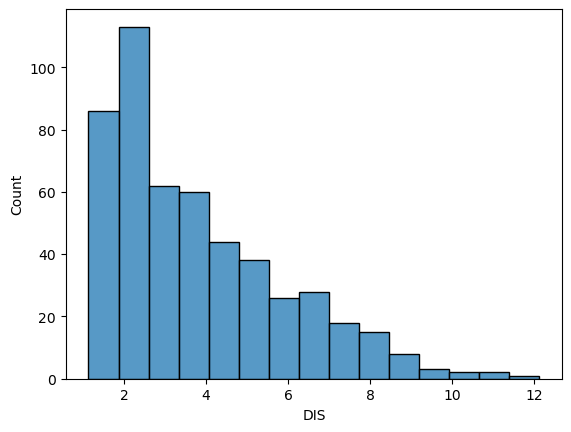

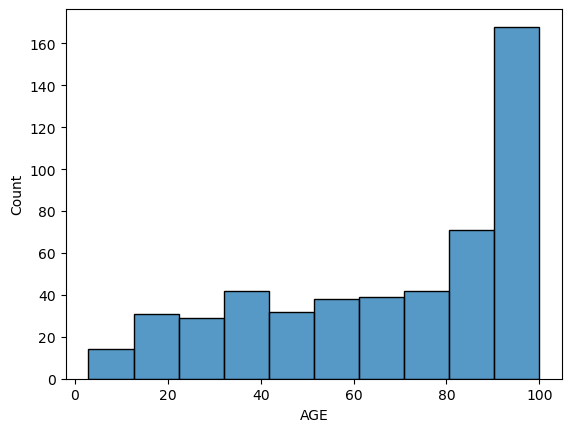

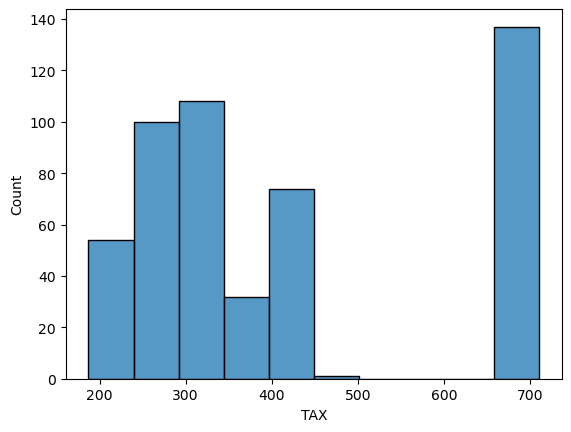

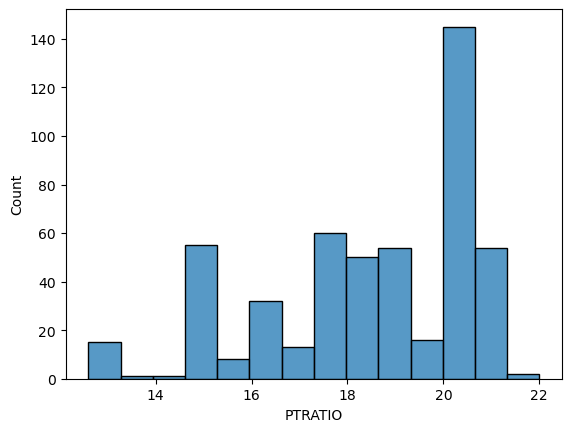

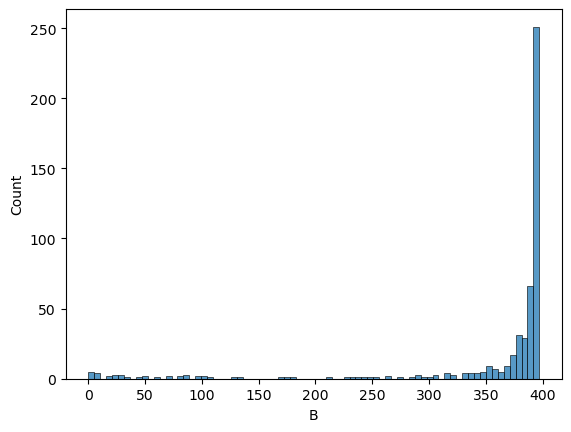

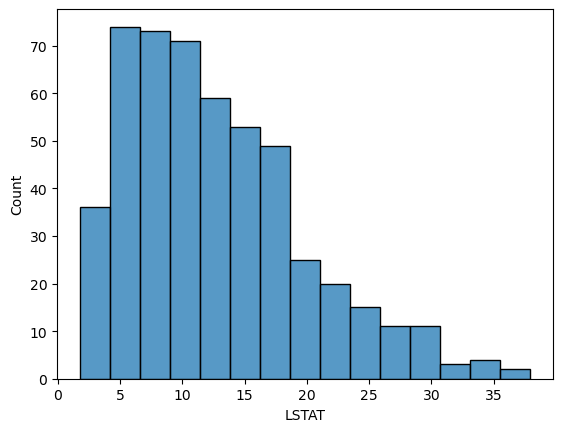

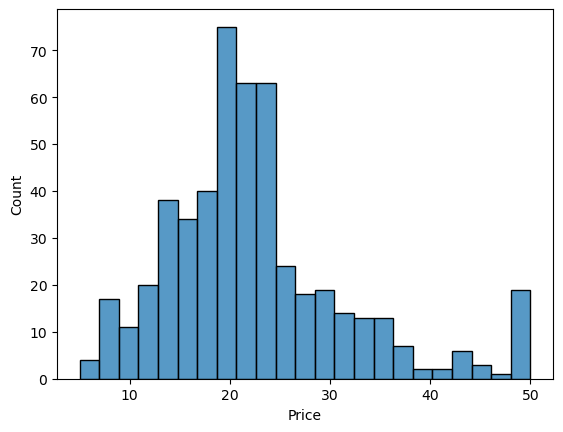

In [36]:
#Univariant analysis
for i in num_cols:
    sns.histplot(x = df[i])
    plt.show()



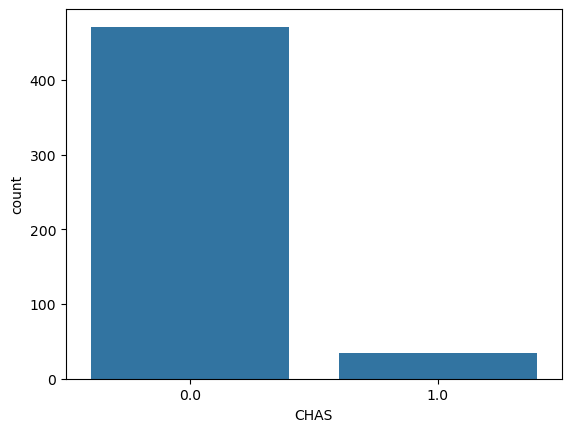

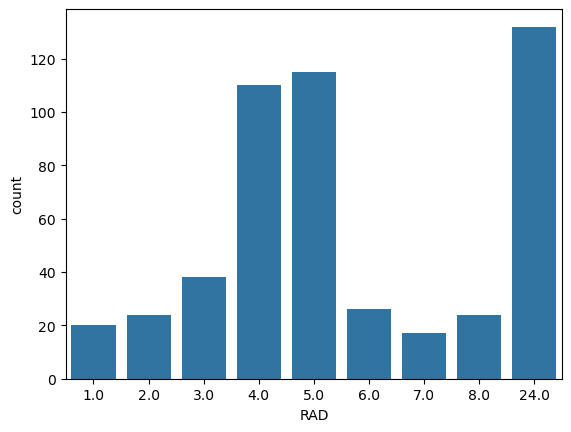

In [38]:
 for i in cat_cols:
     sns.countplot(x = df[i])
     plt.show()

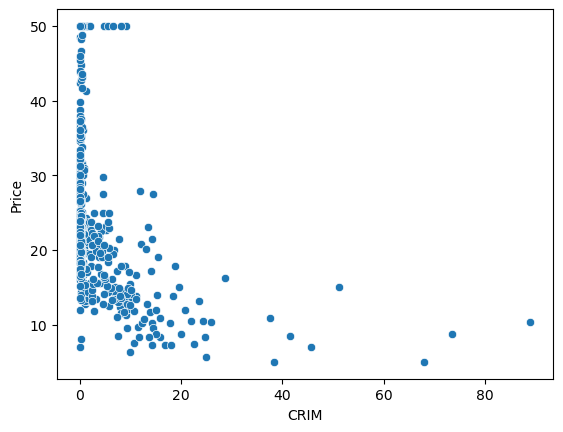

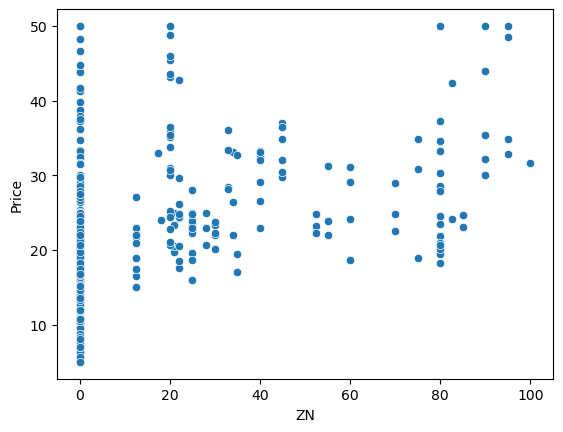

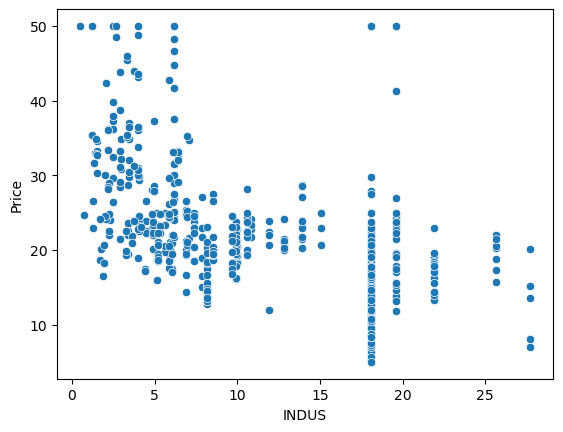

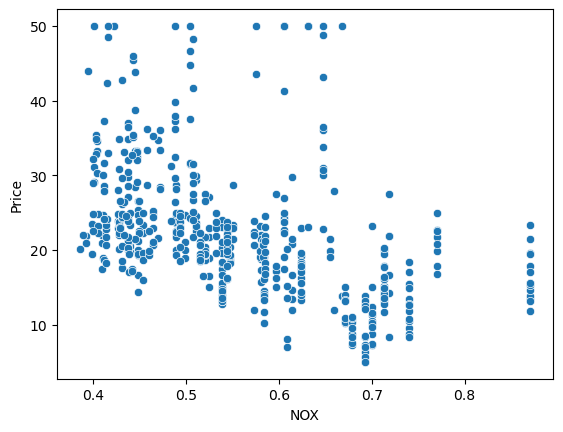

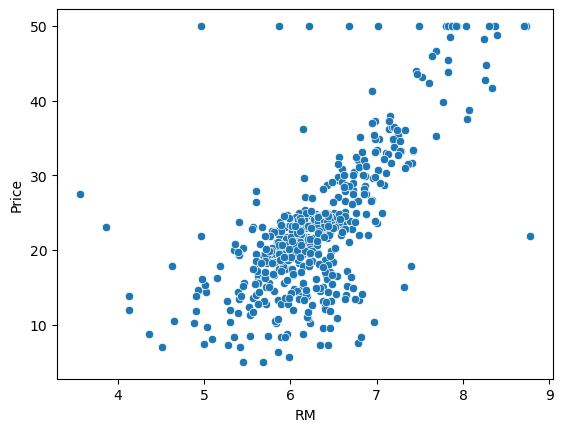

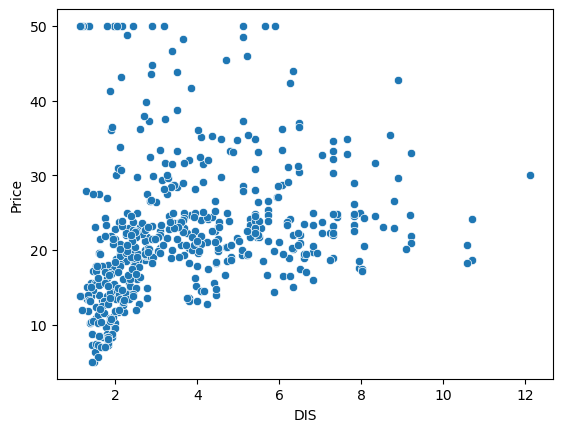

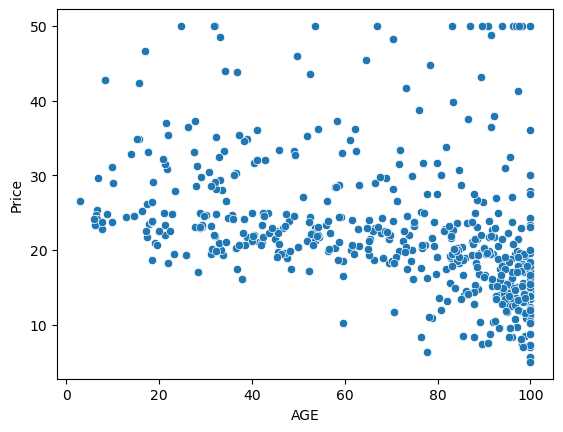

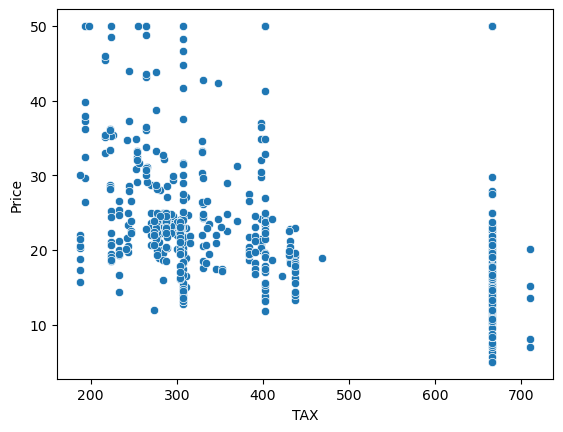

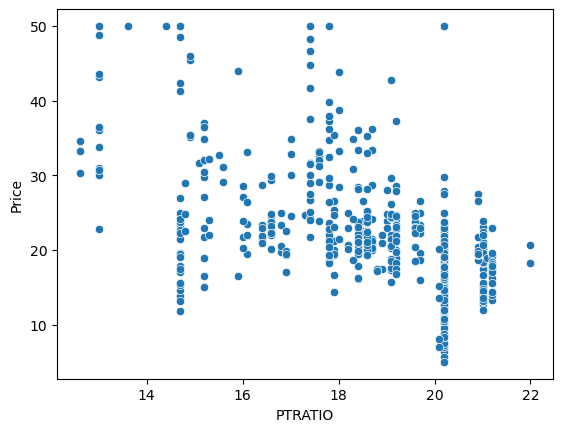

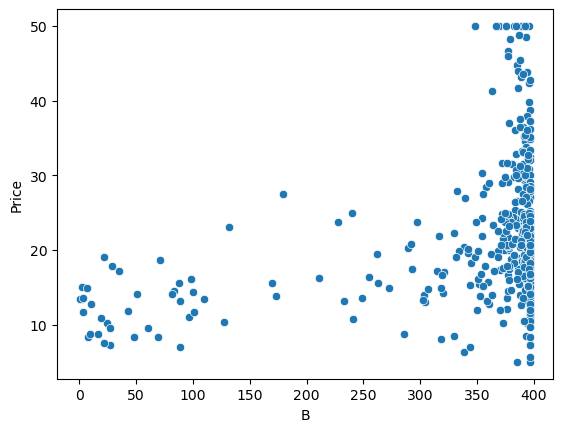

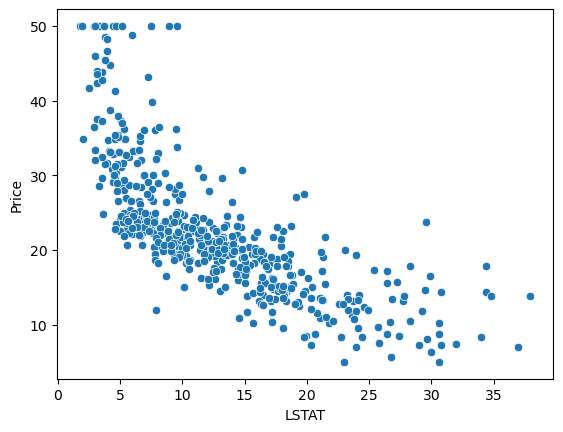

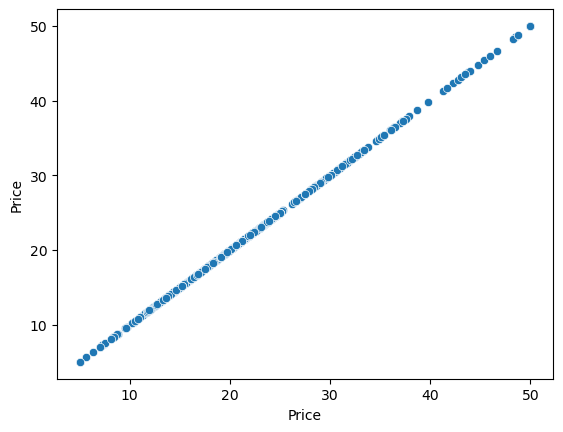

In [42]:
#Bi variant analysis
for i in num_cols:
    sns.scatterplot(x = df[i],y=df["Price"])
    plt.show()

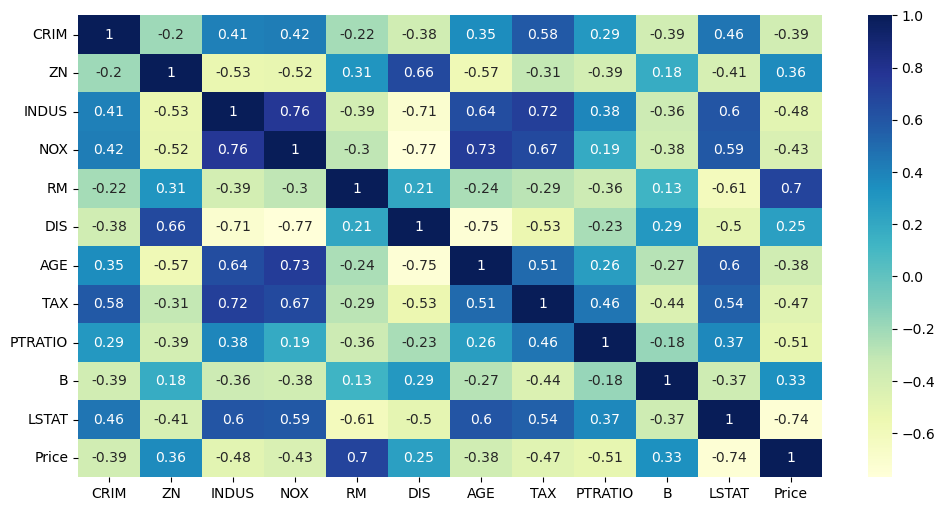

In [44]:
#Multivariant analysis
plt.figure(figsize = (12, 6))
sns.heatmap(df[num_cols].corr(),annot = True, cmap="YlGnBu")
plt.show()

### Pre processing Step
### Dummy Variable Creation(one hot Encoding) 


In [49]:
df[cat_cols].nunique()

CHAS    2
RAD     9
dtype: int64

In [53]:
df["RAD"].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [55]:
df["CHAS"].unique()

array([0., 1.])

In [57]:
df1 = pd.get_dummies(df,columns=["RAD"],drop_first=True,dtype=int)

In [59]:
df1.shape

(506, 21)

In [63]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0',
       'RAD_5.0', 'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0'],
      dtype='object')

In [65]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,LSTAT,Price,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,...,4.98,24.0,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,...,9.14,21.6,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,...,4.03,34.7,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,...,2.94,33.4,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,...,5.33,36.2,0,1,0,0,0,0,0,0


## Step 2.2: Splitting the Data into Training and Testing Sets and ReScaling

As you know, the first basic step for regression is performing a train-test split.
- Before model building, you first need to perform the test-train split and scale the features.
- Splitting into train and test
- Rescaling of variables

In [69]:
X=df1.drop(["Price"],axis=1)
y=df1["Price"]

In [82]:
import sklearn ##sklearn is a package and model_selection is a library
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train,y_test= train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)

(404, 20)
(102, 20)


### Rescaling the Features 
 - Advantage
   - Interpretability
   - rescaling between 0 and 1..compare to other number like 1000 or 100000...the optimization is very faster...

In [86]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [92]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)

In [94]:
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [96]:
X_train_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,1.892434,-0.495778,1.035280,-0.288288,1.019549,-0.074765,1.128863,-1.175156,1.543468,0.813975,0.387891,1.262678,-0.203069,-0.293294,-0.535373,-0.543021,-0.239983,-0.196368,-0.22215,1.709482
1,-0.327672,-0.495778,-0.161802,-0.288288,-0.077387,-0.218185,-0.552953,-0.561852,-0.600514,-0.039554,0.424998,-0.910043,-0.203069,-0.293294,1.867857,-0.543021,-0.239983,-0.196368,-0.22215,-0.584972


In [98]:
X_test_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,-0.425536,2.980046,-1.385161,-0.288288,-1.286608,1.417661,-1.069612,1.721143,-0.452449,-2.789815,0.369808,-0.822034,4.924429,-0.293294,-0.535373,-0.543021,-0.239983,-0.196368,-0.222150,-0.584972
1,-0.372998,-0.495778,-0.701948,-0.288288,-0.422879,0.392417,-1.671787,-0.202535,-0.582746,-0.513737,0.230542,-1.215324,-0.203069,-0.293294,-0.535373,-0.543021,-0.239983,-0.196368,4.501462,-0.584972


In [100]:
#Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [102]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=8)#8-25

In [104]:
selector=selector.fit(X_train_df,y_train)
selector.support_

array([False,  True, False, False,  True,  True, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True])

In [106]:
X_train_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD_2.0', 'RAD_3.0', 'RAD_4.0', 'RAD_5.0',
       'RAD_6.0', 'RAD_7.0', 'RAD_8.0', 'RAD_24.0'],
      dtype='object')

In [108]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['ZN', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'RAD_24.0'], dtype='object')


In [110]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

In [112]:
print(X_train.shape)
print(X_test.shape)


(404, 8)
(102, 8)


## Modelling

In [115]:
import statsmodels.api as sm

In [139]:
#build a model with all variables
X_train_sm=sm.add_constant(X_train)

X_test_sm=sm.add_constant(X_test)

#create  model
lr=sm.OLS(np.array(y_train), X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          7.99e-102
Time:                        17:12:26   Log-Likelihood:                -1210.2
No. Observations:                 404   AIC:                             2438.
Df Residuals:                     395   BIC:                             2474.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.243     92.912      0.000      22.142      23.100
ZN             0.9510      0.357      2.661      0.008       0.248       1.654
NOX           -1.7966      0.472     -3.806      0.000      -2.725      -0.869
RM             2.5649      0.331      7.744      0.000       1.914       3.216
DIS           -2.9438      0.440     -6.689      0.000      -3.809      -2.079
TAX           -2.0034      0.627     -3.198      0.001      -3.235      -0.772
PTRATIO       -1.9939      0.321     -6.219      0.000      -2.624      -1.364
LSTAT         -4.1124      0.380    -10.812      0.000      -4.860      -3.365
RAD_24.0       1.8014      0.584      3.087      0.002       0.654       2.949
==============================================================================
Omnibus:                      139.674   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.273
Skew:                           1.480   Prob(JB):                    3.28e-125
Kurtosis:                       8.029   Cond. No.                         6.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,ZN,2.154506
2,NOX,3.758312
3,RM,1.850761
4,DIS,3.267930
5,TAX,6.622542
6,PTRATIO,1.734007
7,LSTAT,2.440413
8,RAD_24.0,5.744009


In [143]:
X_train_sm = X_train_sm.drop('TAX', axis=1)
X_test_sm = X_test_sm.drop('TAX', axis=1)

In [145]:


#X_test_sm=sm.add_constant(X_test)

#create  model
lr=sm.OLS(np.array(y_train), X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     134.9
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.00e-100
Time:                        17:14:20   Log-Likelihood:                -1215.4
No. Observations:                 404   AIC:                             2447.
Df Residuals:                     396   BIC:                             2479.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.246     91.849      0.000      22.137      23.105
ZN             0.7964      0.358      2.223      0.027       0.092       1.501
NOX           -2.1964      0.460     -4.771      0.000      -3.102      -1.291
RM             2.6747      0.333      8.026      0.000       2.019       3.330
DIS           -2.8618      0.444     -6.439      0.000      -3.736      -1.988
PTRATIO       -2.1447      0.321     -6.686      0.000      -2.775      -1.514
LSTAT         -4.1423      0.385    -10.770      0.000      -4.898      -3.386
RAD_24.0       0.3443      0.369      0.934      0.351      -0.381       1.069
==============================================================================
Omnibus:                      130.981   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.232
Skew:                           1.414   Prob(JB):                    3.53e-107
Kurtosis:                       7.596   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
X_train_sm=X_train_sm.drop("RAD_24.0",axis=1)
X_test_sm=X_test_sm.drop("RAD_24.0",axis=1)

In [149]:
model3=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     157.3
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          1.18e-101
Time:                        17:14:54   Log-Likelihood:                -1215.8
No. Observations:                 404   AIC:                             2446.
Df Residuals:                     397   BIC:                             2474.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6210      0.246     91.864      0.000      22.137      23.105
ZN             0.8736      0.348      2.507      0.013       0.189       1.559
NOX           -2.0108      0.415     -4.843      0.000      -2.827      -1.195
RM             2.7214      0.329      8.261      0.000       2.074       3.369
DIS           -2.8917      0.443     -6.524      0.000      -3.763      -2.020
PTRATIO       -1.9969      0.279     -7.158      0.000      -2.545      -1.448
LSTAT         -4.0934      0.381    -10.744      0.000      -4.842      -3.344
==============================================================================
Omnibus:                      138.501   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.832
Skew:                           1.481   Prob(JB):                    6.65e-120
Kurtosis:                       7.882   Cond. No.                         4.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,ZN,2.002172
2,NOX,2.842837
3,RM,1.789621
4,DIS,3.239984
5,PTRATIO,1.283293
6,LSTAT,2.393720


In [153]:
y_train_pred=res3.predict(X_train_sm)
y_test_pred=res3.predict(X_test_sm)

In [155]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.704 Test: 0.733
